In [1]:
import copy
from scipy import constants
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 7]

In [2]:
def has_converged(delta, c):
  return all(
    all(el == None or el <= c for el in row)
    for row in delta
  )

def get_pos(arr, i, j):
  if j < 0:
    # return item that is in j = 1 to mirror the 1 column in the -1 position
    return arr[i][1] or 0
  elif i < 0 or i >= len(arr) or j >= len(arr[0]):
    return 0
  
  return arr[i][j] or 0

def init_potential(Nx, Ny, Nh, Nl, V0):
  fixed_potential = []

  for i in range(Nx + 1):
    fixed_potential.append([None] * (Ny + 1))
    fixed_potential[i][-1] = 0

  fixed_potential[Nh][0:(Nl+1):1] = [V0/2] * (Nl + 1)
  fixed_potential[0] = [0] * (Ny + 1)
  fixed_potential[-1] = [0] * (Ny + 1)

  return fixed_potential

No próximo bloco de código é feita a inicialização dos dados e das matrizes:

`fixed_potential`: matriz auxiliar que representa o estado inicial do potencial, e nunca é alterada após a inicialização

`potential`: a matriz do potencial que será atualizada após cada iteração

`delta`: matriz que armazena a diferença dos valores após cada iteração, servindo como verificação da convergência

In [3]:
Dx = 3
Dy = 3
h = 0.1
w = 1
d = 2
lx = 2
V0 = 1
c = 0.0001

Nx = int(Dx//h)
Ny = int(Dy//h)
Nh = int(d//(2*h))
Nl = int(lx//(2*h))

fixed_potential = init_potential(Nx, Ny, Nh, Nl, V0)

potential = copy.deepcopy(fixed_potential)

delta = []
for i in range(Nx + 1):
  delta.append([None] * (Ny + 1))

first_run = True

count = 0

while (not has_converged(delta, c)) or first_run:
  count += 1
  first_run = False

  for i, row in enumerate(potential):
    for j, el in enumerate(row):
      if fixed_potential[i][j] == None:
        up = get_pos(potential, i - 1, j)
        down = get_pos(potential, i + 1, j)
        left = get_pos(potential, i, j - 1)
        right = get_pos(potential, i, j + 1)

        new_value = (1 - w)*get_pos(potential, i, j) + w*(up + down + left + right)/4

        diff = abs(new_value - get_pos(potential, i, j))
        potential[i][j] = new_value
        delta[i][j] = diff

print(count)

269


No próximo bloco o campo elétrico é calculado pela função `gradient` do numpy e são exibidos os gráficos do potencial e do campo elétrico

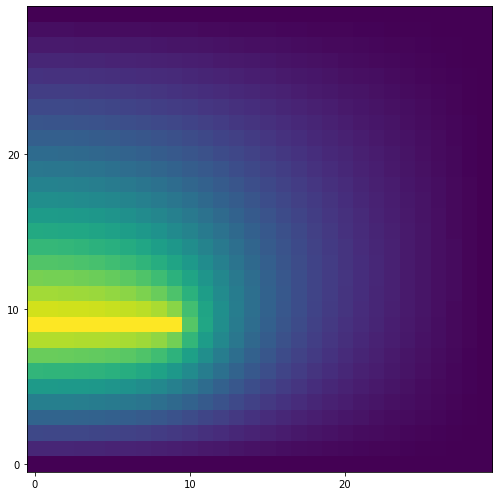

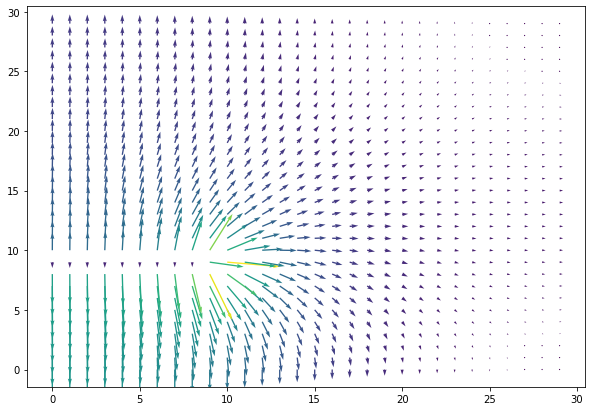

In [4]:
fig, ax = plt.subplots()
im = ax.imshow(potential)

# Show all ticks
ax.set_xticks(np.arange(len(potential[0]), step=10))
ax.set_yticks(np.arange(len(potential), step=10))

ax.invert_yaxis()

fig.tight_layout()
plt.show()

grad = np.gradient(potential)

field_y = -1*grad[0]
field_x = -1*grad[1]

u = field_x
v = field_y
M=np.hypot(u,v)

fig, ax = plt.subplots()
q = ax.quiver(u, v, M)
plt.show()

O próximo bloco de código realiza a integral do campo pela superfície gaussiana, que no caso se torna uma integral de linha

O caminho escolhido foi o caminho o mais próximo possível da placa
As componentes y de cada vetor foram somadas e multiplicadas por 2, assim como as componentes x dos vetores laterais

Por fim, a carga foi encontrada multiplicando-se a soma por h e pela permissividade elétrica no vácuo

In [5]:
sum = 0

for df in field_y[Nh + 1][1:Nl+1]:
  sum += df

for df in field_y[Nh - 1][1:Nl+1]:
  sum += -1*df

sum += field_x[Nh][Nl+2]

sum *= 2

sum += field_y[Nh + 1][0]
sum += -1*field_y[Nh - 1][0]

charge = sum*h*constants.epsilon_0

In [6]:
capacitance = charge/V0

print(f'Capacitance: {capacitance}')

Capacitance: 1.9576897288940854e-12
